In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import umap
import umap.plot

In [ ]:
# kmer_dist = np.load("/big/work/metadevol/benchmark_dataset1/X_kmerdist_parallelized.npy", allow_pickle=True)
# tri = np.zeros((45760, 45760))
# flatten_kmercount = np.hstack(kmer_dist).astype(np.float32)
# tri[np.triu_indices(45760,0)] = flatten_kmercount
# kmerdist_matrix = np.tril(tri.T,1) + np.triu(tri)
# del tri
kmerdist_matrix = np.load("/big/work/metadevol/benchmark_dataset1/kmerdist_matrix_new.npy")
my_model = umap.UMAP(metric='precomputed')
my_model_fit = my_model.fit(np.matrix(kmerdist_matrix))

/home/yazhini/.local/lib/python3.8/site-packages/umap/umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


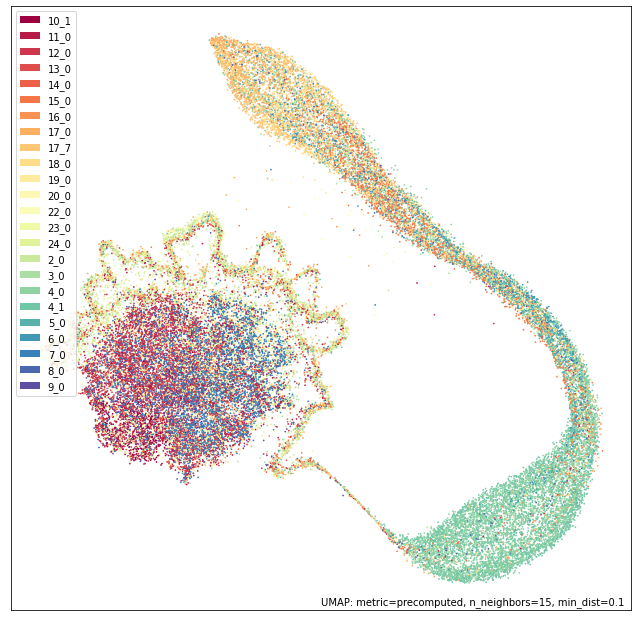

In [8]:
labels = pd.read_csv("/big/work/metadevol/benchmark_dataset1/contigs_umap_hoverdata1", header=None, sep=' ')
labels.columns = ["index","contig_id","contig_name","length","genome_id","cluster_id", "cluster_idnew", 'connected_comp', 'check_mem',"bin_idZ", "bin_idZfull", "bin_idZfullopt"]
umap.plot.points(my_model_fit, labels=labels['genome_id'])

plt.savefig("/big/work/metadevol/benchmark_dataset1/umap_kmerdist_256.png",dpi=600,format="png",bbox_inches="tight")

In [14]:
labels = pd.read_csv("/big/work/metadevol/benchmark_dataset1/contigs_umap_hoverdata1", header=None, sep=' ')
labels.columns = ["index","contig_id","contig_name","length","genome_id","cluster_id", "cluster_idnew", 'connected_comp', 'check_mem',"bin_idZ", "bin_idZfull", "bin_idZfullopt"]

In [7]:
umap.plot.output_notebook()
pp = umap.plot.interactive(my_model_fit, labels=labels["genome_id"], hover_data=labels, point_size=4)
umap.plot.show(pp)

Loading BokehJS ...

In [33]:
np.shape(np.arange(0,100).reshape(10,10)[:,[0]])

(10, 1)

In [20]:
from mycolorpy import colorlist as mcp
import numpy as np

color2=mcp.gen_color(cmap="bwr",n=24)

In [33]:
np.power(2,15000)

0

In [55]:
from scipy.optimize import minimize
import numpy as np
import simdefy as sm

sm.init()

log_gamma = sm.log_gamma_avx2

# def factorial(x):
#     return log_gamma(x + 1)

def train_alpha(param, *argv):
    a, b = param
    Rc = argv[0]
    lc = argv[1]
    first_term = log_gamma(Rc+a)
    second_term = log_gamma(a)
    third_term = a * np.log(b/lc)
    fourth_term = (Rc + a) * np.log(1 + (b/lc))
    maximize_term = (first_term - second_term + third_term - fourth_term).sum()
    return -maximize_term

def optimize_negbin_params(*argv):
    Rc = argv[0]
    lc = np.array(argv[1])
    a = 0.8
    Rc_lc = (Rc / lc).sum() / len(lc)
    b = a * 1 / Rc_lc
    # fun = lambda a, b: train_alpha(a, b, Rc, lc)
    optimize_alpha = minimize(train_alpha, [a, b], args = (Rc,lc), method = 'nelder-mead')
    print(optimize_alpha.x)
    return np.exp(optimize_alpha.x)


if __name__ == "__main__" :
    tmp_dir = "/big/work/metadevol/benchmark_dataset1/"
    read_counts = pd.read_pickle(tmp_dir + 'X_pickle')
    read_counts = read_counts.to_numpy(dtype=np.float32)
    label = pd.read_csv(tmp_dir + 'contigs_ids_distindex', sep =' ', header = None)
    Rc = read_counts.sum(axis=0)
    lc = label[3]
    a, b = optimize_negbin_params(Rc, lc)
    print(a, b)


[  7.7705915  122.50006542]
2369.8726474866166 1.5889215142688076e+53


In [43]:
[  7.7705915  122.50006542]
2369.8726474866166 1.5889215142688076e+53



2.1329823086078656

In [46]:
import scipy as sp

sp.__version__

'1.9.3'

In [47]:
import setuptools


In [50]:
setuptools.__version__

'59.8.0'

In [53]:
sys.

NameError: name 'version' is not defined